### Бондарев Алексей, Аналитик данных (gamedav). Тестовое задание (Python) от 03.07.2024.

## Описание задания:
(Python) Для выполнения этого задания требуется сгенерировать DataFrame с синтетическими данными. DataFrame должен состоять из 1000 строк и 5 колонок. Каждую из колонок мы предлагаем тебе создать и наполнить следующим образом:
- 1-я колонка – user_id – идентификатор пользователя. Длина user_id должна равняться 15-ти символам. Идентификатор состоит из случайной комбинации следующих символов: "1234567890abcdefghijk". Для каждой строки в DataFrame значение user_id формируются случайным образом. Добавь проверку на уникальность сгенерированного user_id.
- 2-я колонка – purchase_number – номер покупки. Столбец необходимо заполнить случайными значениями в диапазоне от 0 до 10.
- 3-я колонка – interval – время, прошедшее с момента предыдущей покупки пользователя. Столбец необходимо заполнить случайными значениями из нормального распределения со средним 1440 и стандартным отклонением 200. Обрати внимание, что для первой покупки пользователей данное поле должно быть пустым (null), т.к. предыдущей покупки у пользовля не было.
- 4-я колонка – amount – стоимость покупки. Значения для этого столбца необходимо взять из экспоненциального распределения с паметром λ = 1.
- 5-я колонка – retention – день жизни покупателя, в который он совершил покупку. Необходимо сгенерировать значения 1, 2, 3, 4, 5 с вероятностями 0.35, 0.25, 0.2, 0.15, 0.05 соответственно.

## Задачи:
 - Для всех строк исходного датасета, сгруппированных по номеру покупки,
посчитать среднее значение интервала от предыдущей покупки (3 колонка) по
группе. Результат необходимо добавить в новый столбец датафрейма.
 - Напиши функцию, которая принимает на вход значение user_id и возвращает
строку следующего вида: все буквы в той последовательности, в которой они
встречаются в user_id, затем все цифры в user_id в той последовательности, в
которой они встречаются в user_id. Добавь результат применения этой функции
к user_id в новый столбец.
 - Вычисли моду, медиану, среднее, дисперсию и стандартное отклонение для
столбцов interval, amount и retention. Построй гистограммы распределения
значений в столбцах.
 - Построй график, который наиболее полно, на твой взгляд, описывает
зависимость интервала между покупками и номера покупки. Обоснуй, почему ты
так считаешь?

# Импорт библиотек.

In [42]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns

# Часть 1. Создаем DataFrame 5*1000:

## Создаем колонки:

In [167]:
# Клонка 1 user_id:
# Функция user_id_generator создает иденттфикатор пользователя:
def user_id_generator():
    return ''.join([random.choice('1234567890abcdefghijk') for x in range(15)])

# С помощью генератора списка, создается последовательность значений для столбца - user_id:
user_id = pd.Series([user_id_generator() for k in range(1_000)])
user_id

0      kkf400fk0h24ba6
1      5i5i57a8bb4cia9
2      cc7h11793i5485e
3      hgacbjk285eh4e6
4      jh33ikdiad93g59
            ...       
995    f9321ic2d8k7b0f
996    0k9d2jck915ii84
997    a3h586fa9a5i4d3
998    a6318212f1beh05
999    dji6376i280hhj9
Length: 1000, dtype: object

In [165]:
# Проверим на уникальность сгенерированного user_id:
user_id.nunique()

1000

In [47]:
# Колонка 2 purchase_number:

# С помощью генератра списка создаем последовательность значений для столбца purchase_number:
purchase_number = pd.Series([random.randint (1, 10) for x in range(0,1_000)])

<Axes: >

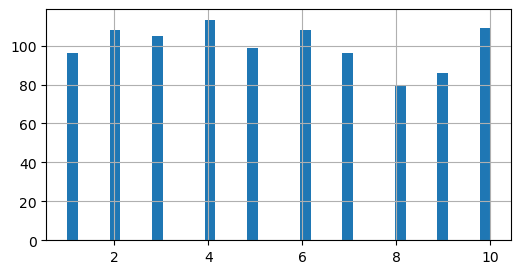

In [49]:
# Посмотрим на распределение purchase_number:
purchase_number.hist(bins=40, figsize=(6,3))

In [50]:
# Для заполнения столбца interval значениями из нормального распределегния используем функцию normalvariate из модуля - random:
# где mu - среднее равное 1440, sigma - стандартное отклонение равное 200.

interval = pd.Series([round(random.normalvariate(mu=1_440, sigma=200)) for x in range(1_000)])
interval[0:10]

0    1479
1    1407
2    1320
3    1273
4    1464
5    1411
6    1398
7    1479
8    1399
9    1741
dtype: int64

<Axes: ylabel='Frequency'>

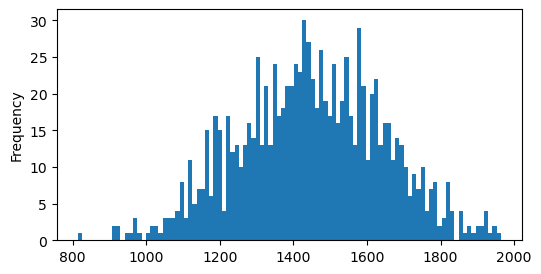

In [53]:
# Посмотрим на распределение interval:
interval.plot(kind='hist', bins=100, figsize=(6,3))

<Axes: >

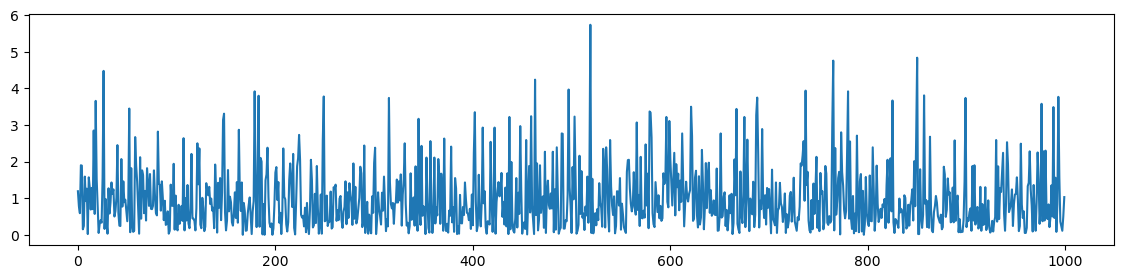

In [56]:
# Колонка 4 amount: Значения столбца должны быть заполненны с помощью экспоненициального распределения с параметром λ = 1:

# Как и в предыдущиих столбцах используем генератор списка:
amount = pd.Series([round(random.expovariate(lambd=1.0), 2) for x in range(1_000)])
amount.plot(figsize=(14,3))

In [58]:
# Для расчета значений колонки retention, создаем функцию вероятностей:
def probability_function(prob_value):
    if 0 <= prob_value <= .05:
        return 5
    elif .05 < prob_value <= .2:
        return 4
    elif .2 < prob_value <= .4:
        return 3
    elif .4 < prob_value <= .65:
        return 2
    elif .65 < prob_value <= 1:
        return 1

In [61]:
# Колонка 5 retention:
retention = pd.Series([probability_function(random.random()) for x in range(1_000)])
retention.value_counts(normalize=True)

1    0.335
2    0.263
3    0.223
4    0.139
5    0.040
Name: proportion, dtype: float64

## Собираем сгенерированные колонки в один DataFrame:

In [64]:
df = pd.DataFrame({'user_id':user_id, 'purchase_number':purchase_number, 'interval':interval, 'amount':amount, 'retention': retention})

In [66]:
df

,user_id,purchase_number,interval,amount,retention
0,48i7j7bg12h181h,2,1479,1.19,1
1,kf01g9b50eci905,4,1407,0.78,3
2,iakichdc7eg08b0,3,1320,0.59,2
3,4b3kk66g03gi805,1,1273,1.90,5
4,109cd2f93gj4aig,2,1464,1.89,1
...,...,...,...,...,...
995,2i8fkjchbgd9g5c,8,1305,0.36,1
996,da2ag4c8b3c92b5,3,1785,0.23,2
997,66ce9g7960hggdh,4,1194,0.11,1
998,g4if0efcd254b3d,7,1173,0.50,1


## Добавим условие: Для первой покупки (purchase_number = 1), поле interval должно быть пустым, т.к. предыдущей покупки у пользователей не было:

In [68]:
# Присваиваем значение np.nan колонке interval, если purchase_number = 1:
df.loc[df['purchase_number'] == 1, 'interval'] = np.nan

# Проверка:
df[df['purchase_number'] == 1]

,user_id,purchase_number,interval,amount,retention
3,4b3kk66g03gi805,1,NaN,1.90,5
13,f7ejgkg6g927hhj,1,NaN,0.69,1
46,h3h8hc699ekbd7b,1,NaN,1.46,2
50,khb5a2a6aa0k0be,1,NaN,0.37,2
57,jh2id0j9afe37jf,1,NaN,0.11,3
...,...,...,...,...,...
955,348d50eddfkj640,1,NaN,2.49,5
956,8cghk9c6ae98255,1,NaN,0.83,2
957,2ceekh182b8f0gi,1,NaN,0.46,1
985,9b0142ed341fh81,1,NaN,0.47,1


# Часть 2. Задачи

## Задача 1:
 - Для всех строк исходного датасета, сгруппированных по номеру покупки, посчитать среднее значение интервала от предыдущей покупки (3 колонка) по группе. Результат необходимо добавить в новый столбец датафрейма.

In [72]:
# Создаем Series среднего значения interval по группе purchase_number:
interval_group_p_n = df.groupby('purchase_number')['interval'].mean()
interval_group_p_n

purchase_number
1             NaN
2     1429.157407
3     1448.114286
4     1418.929204
5     1449.757576
6     1462.212963
7     1447.958333
8     1424.675000
9     1463.220930
10    1452.201835
Name: interval, dtype: float64

In [76]:
# Добавим результат в новый столбец: для этого
# Соединим таблцы:
df_merges = pd.merge(df, interval_group_p_n, how='left', left_on='purchase_number', right_on='purchase_number', suffixes=(None, '_y'))

# Переименуем новый столбец:
df_merges = df_merges.rename(columns={'interval_y':'mean_group_interval'})

# Посмотрим часть DataFrame:
df_merges[10:20]

,user_id,purchase_number,interval,amount,retention,mean_group_interval
10,ci8j05i9249434a,7,1315.0,0.02,4,1447.958333
11,aba9c5cfkca52bj,3,1652.0,1.57,1,1448.114286
12,b7fh0ik06567579,9,1699.0,1.29,1,1463.220930
13,f7ejgkg6g927hhj,1,NaN,0.69,1,NaN
14,18jh874jkj7kf59,3,1573.0,1.28,4,1448.114286
15,719hk7a2dac16hc,4,1442.0,0.70,2,1418.929204
16,i2fchh0hf17i5ih,6,1435.0,2.85,3,1462.212963
17,3gh27858f768j18,3,987.0,0.57,1,1448.114286
18,bk3hg9f0ffjgh85,9,1284.0,3.66,4,1463.220930
19,i5b457f7k785948,10,1491.0,1.52,1,1452.201835


## Задача 2:
 - Напиши функцию, которая принимает на вход значение user_id и возвращает строку следующего вида: все буквы в той последовательности, в которой они встречаются в user_id, затем все цифры в user_id в той последовательности, в которой они встречаются в user_id. Добавь результат применения этой функции
к user_id в новый столбец.

In [88]:
# Создаем функцию, которая разделяет буквы и цифра на два списка, а затем объединяет в одну строку:
def digigt_character(idx):
    digits = []
    characters = []
    container = []
    
    for x in idx:
        if x.isalpha():
            characters.append(x)
        elif x.isdigit():
            digits.append(x)
    container = ''.join(characters + digits)
    
    return container

In [90]:
# Создаем новый столбец user_id_separated, применяем функцию digigt_character к столбцу user_id:
df_merges['user_id_separated'] = df_merges['user_id'].apply(digigt_character)

In [92]:
df_merges[0:20]

,user_id,purchase_number,interval,amount,retention,mean_group_interval,user_id_separated
0,48i7j7bg12h181h,2,1479.0,1.19,1,1429.157407,ijbghh487712181
1,kf01g9b50eci905,4,1407.0,0.78,3,1418.929204,kfgbeci01950905
2,iakichdc7eg08b0,3,1320.0,0.59,2,1448.114286,iakichdcegb7080
3,4b3kk66g03gi805,1,NaN,1.90,5,NaN,bkkggi436603805
4,109cd2f93gj4aig,2,1464.0,1.89,1,1429.157407,cdfgjaig1092934
5,h7i1i0a2f3ea8g8,7,1411.0,0.15,1,1447.958333,hiiafeag7102388
6,k96f406khjj30gc,3,1398.0,0.24,3,1448.114286,kfkhjjgc9640630
7,2e78akkeh7bgk3f,7,1479.0,1.59,2,1447.958333,eakkehbgkf27873
8,h6gjkfde3hjh9b0,6,1399.0,0.92,4,1462.212963,hgjkfdehjhb6390
9,81hha1e73855845,7,1741.0,1.26,4,1447.958333,hhae81173855845


## Задача 3:
 - Вычисли моду, медиану, среднее, дисперсию и стандартное отклонение для 
столбцов interval, amount и retention. Построй гистограммы распределени 
значений в столбцах.

In [97]:
# Объявим функцию которая выведет данные описательные статистики:
def descriptive_statistics(col):
    print(col.upper() + ':')

    # Для оформления результата используем f - строки:
    display(f'Мода : {", ".join(df[col].mode().astype(str))}') # На случай мультимодального распределния, соединяем значения в одну строку, т.к. .mode всегда возвращает Series. 
    display(f'Медиана : {round(df[col].median(), 2)}')
    display(f'Среднее : {round(df[col].mean(), 2)}')
    display(f'Дисперсия : {round(df[col].std(), 2)}')
    display(f'Ст. отклонение : {round(df[col].var(), 2)}')

# Вызываем функцию для каждого столбца:
for x in 'interval', 'amount', 'retention':
    descriptive_statistics(x)
    print('\n')

INTERVAL:


'Мода : 1305.0, 1411.0, 1545.0'

'Медиана : 1444.0'

'Среднее : 1443.9'

'Дисперсия : 198.47'

'Ст. отклонение : 39392.31'



AMOUNT:


'Мода : 0.11'

'Медиана : 0.74'

'Среднее : 0.98'

'Дисперсия : 0.88'

'Ст. отклонение : 0.77'



RETENTION:


'Мода : 1'

'Медиана : 2.0'

'Среднее : 2.29'

'Дисперсия : 1.18'

'Ст. отклонение : 1.39'

## Построим гистограммы распределений для колонок: interval, amount, retention:

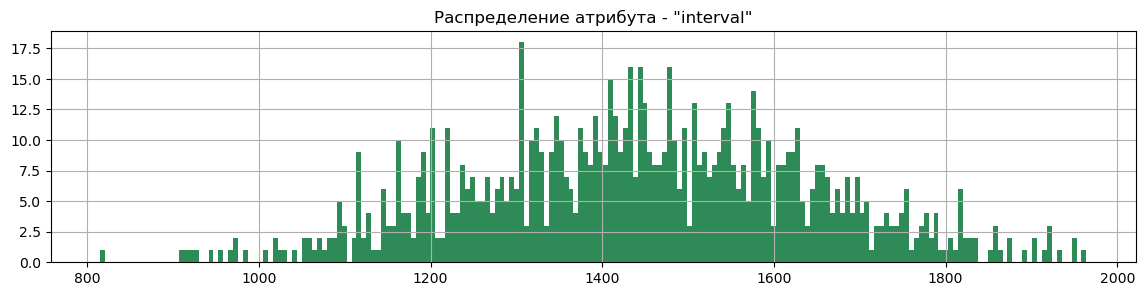

In [99]:
# interval:
ax = df_merges.interval.hist(bins=200, figsize=(14,3), color='#2E8B57')
ax.set_title('Распределение атрибута - "interval"')
plt.show()

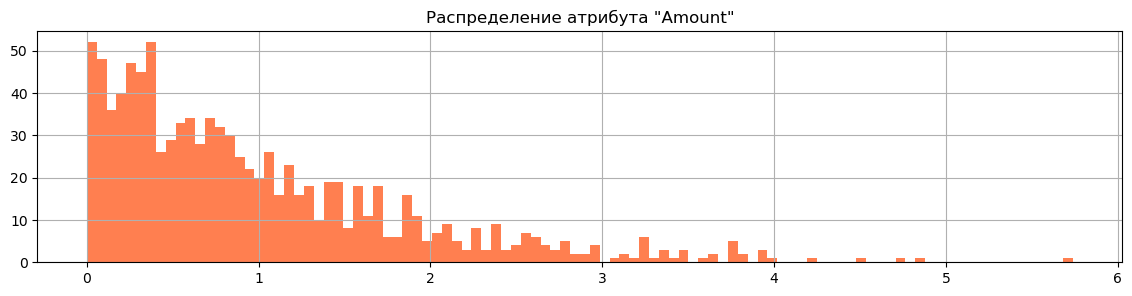

In [101]:
# amount:
fig, ax = plt.subplots(figsize=(14,3))

plt.hist(df_merges['amount'], bins=100, color='#FF7F50')
ax.set_title('Распределение атрибута "Amount"')
ax.grid(True)
plt.show()

<Axes: >

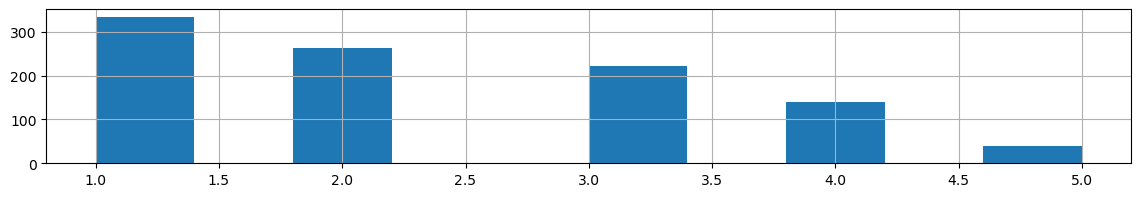

In [103]:
# retention:
df_merges['retention'].hist(figsize=(14,2))

## Замечание по гистограмме для Retention:
 - График гистограммы не подходит, если в данных всего 5 категорий значений. Следует использовать столбчатую диаграмму.

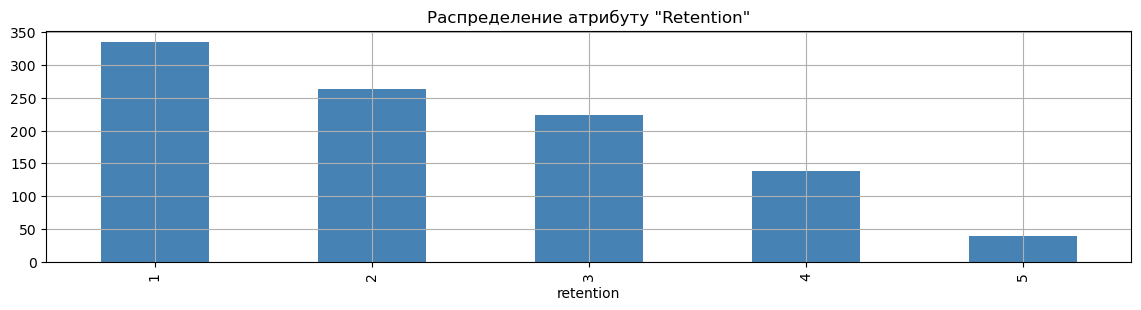

In [107]:
# retention:
ax = df_merges['retention'].value_counts().plot(kind='bar', figsize=(14,3), grid=True, color='#4682B4')
ax.set_title('Распределение атрибуту "Retention"')

plt.show()

## Задача 4:
 - Построй график, который наиболее полно, на твой взгляд, описывает
зависимость интервала между покупками и номера покупки. Обоснуй, почему ты
так считаешь?

## Ответ:
 - Т.к. номер покупки представляет собой категориальную(порядковую) переменную, а интервал числовую, подходящим графиком наиболее полно отображающем зависимость между этими двумя атрибутами будет boxplot с помощью которого можно сравнить между собой значения медиан, квартилей и оценить разброс значений интервала для каждого номера покупки.

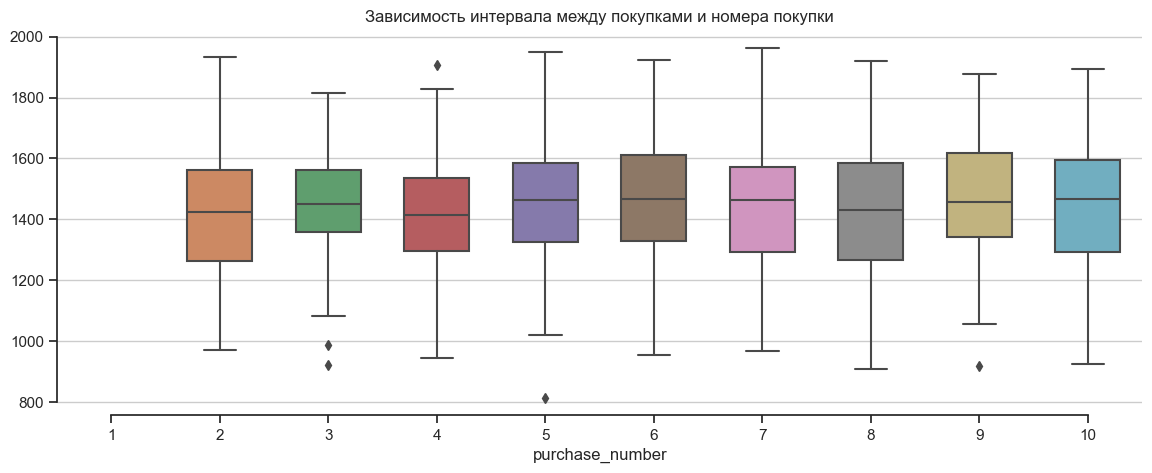

In [109]:
#
sns.set_theme(style="ticks")

fig, ax = plt.subplots(figsize=(14,5))
sns.boxplot(x=df_merges['purchase_number'], y=df_merges['interval'], width=.6)

ax.set_title('Зависимость интервала между покупками и номера покупки')

# Настройки:
ax.yaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, )

plt.show()